### 6. Return_Rate_and_Performance

This analysis focuses on identifying areas with high return rates to minimize associated costs and optimize stock management. The key cuts examined are:
1. Average Return Rate (%) across Regions (North, East, South, West), and Categories by year (2022-2024)
2. Store-specific Return Rate (%) analysis for high-risk categories (e.g., Electronics in the Northern region)

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations (though less used here, it's a good practice)
import numpy as np

# Import matplotlib.pyplot for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced statistical data visualization
import seaborn as sns

# Configure display options for better readability
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Retail\retail_sales_synthetic.csv")

In [3]:
# Convert the 'date' column to datetime objects
df["date"] = pd.to_datetime(df["date"])

# Extract the Year and Month into new columns for easy grouping and analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

print("New columns 'Year' and 'Month' created successfully.")
print(df[['date', 'Year', 'Month']].head())

New columns 'Year' and 'Month' created successfully.
        date  Year  Month
0 2024-09-05  2024      9
1 2022-10-24  2022     10
2 2023-04-19  2023      4
3 2024-06-22  2024      6
4 2024-07-20  2024      7


#### 6.1 Return Rate Analysis Across Regions


--- Average Return Rate (%) by Region and Year ---
Year    2022  2023  2024
region                  
North   2.20  2.04  2.12
East    2.04  2.03  2.02
South   1.89  1.91  1.98
West    1.95  2.08  1.96


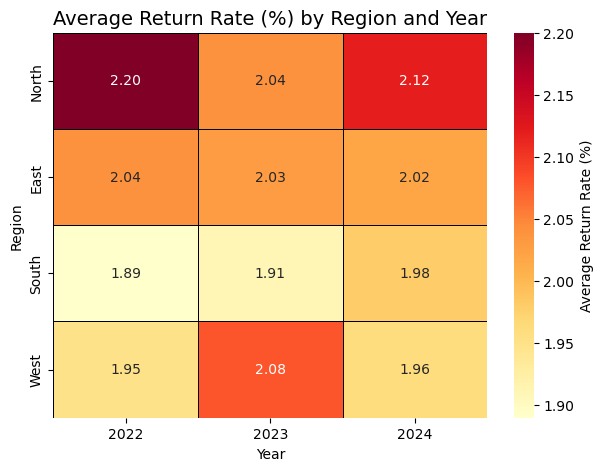

In [4]:
# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Average Return Rate by Region and Year
regional_return_rate = round(df.groupby(["region", "Year"])["Return Rate"].mean().unstack(), 2)
regional_return_rate = regional_return_rate.sort_values(by=2024, ascending=False)

print("\n--- Average Return Rate (%) by Region and Year ---")
print(regional_return_rate)


# Visualization: Return Rate Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(regional_return_rate, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5, 
            linecolor='black', cbar_kws={'label': 'Average Return Rate (%)'})
plt.title('Average Return Rate (%) by Region and Year', fontsize=14)
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()


# Observation: 
# **North** and **South** witnessed an increase in the return rate from 2023 to 2024
# While the East and West regions saw a slight decline or stabilization

#### 6.2 Return Rate Analysis Across Categories


--- Average Return Rate (%) by Category and Year ---
Year         2022  2023  2024
category                     
Sports       2.10  1.88  2.23
Electronics  1.98  2.01  2.12
Home         2.02  1.99  2.00
Clothing     2.01  2.08  1.96
Beauty       1.94  1.92  1.89


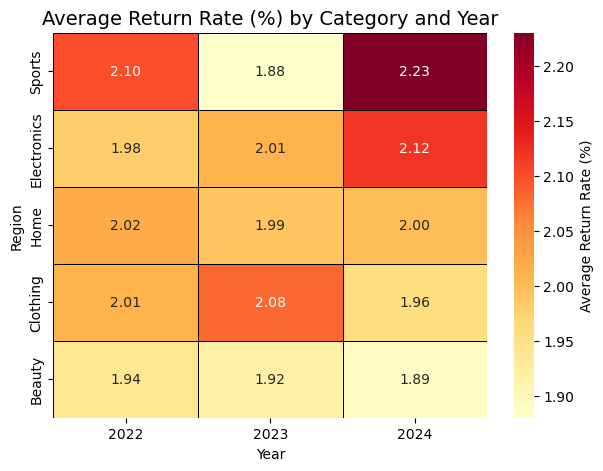

In [5]:
# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Average Return Rate by Category and Year
categorical_return_rate = round(df.groupby(["category", "Year"])["Return Rate"].mean().unstack(), 2)
categorical_return_rate = categorical_return_rate.sort_values(by=2024, ascending=False)

print("\n--- Average Return Rate (%) by Category and Year ---")
print(categorical_return_rate)


# Visualization: Return Rate Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(categorical_return_rate, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=.5, 
            linecolor='black', cbar_kws={'label': 'Average Return Rate (%)'})
plt.title('Average Return Rate (%) by Category and Year', fontsize=14)
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()


# Observation: 
# All categories were heavily clustered around 2-2.4 return rate
# **Sports** and **Electronics** witnessed significant increase in its return rate from 2023 to 2024
# While Home segment saw a slight stabilization
# And Clothing, and Beauty witnessed a decrease in its return rate

#### 6.3 Return Rate Analysis Across clubbed (Regions and Categories) segments for 2024

In [6]:
# Return Rate category and regions wise analysis across 2024

# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Filter data for 2024
df_2024 = df[df["Year"] == 2024]

# Average Return Rate by Category and Region
both_return_rate = round(df_2024.groupby(["category", "region"])["Return Rate"].mean().unstack(), 2)

# Add average across regions for each category
both_return_rate["Average"] = both_return_rate.mean(axis=1)

# Sort categories by their average
both_return_rate = both_return_rate.sort_values(by="Average", ascending=False)

# Add total average row at the bottom
total_avg = both_return_rate.mean(numeric_only=True).to_frame().T
total_avg.index = ["Total Average"]

# Append total average to the table
both_return_rate = pd.concat([both_return_rate, total_avg])

print("\n--- Average Return Rate (%) by Category and Region ---")
print(both_return_rate)

# Observation:
# In 2024: **Electronics** Return Rate was high across all the regions; Major contributors were **North** and **West**
# In 2024: **Sports** Return Rate was high across all the regions; Major contributors were **North**, **South**, and **West**


--- Average Return Rate (%) by Category and Region ---
region          East  North  South   West  Average
Sports         2.210  2.220  2.570  1.760   2.1900
Electronics    1.940  2.360  1.950  2.380   2.1575
Home           2.100  1.930  1.980  1.940   1.9875
Clothing       1.960  2.110  1.950  1.810   1.9575
Beauty         1.880  2.270  1.540  2.050   1.9350
Total Average  2.018  2.178  1.998  1.988   2.0455


#### 6.4 Return Rate of Electronics Segment in North and West Regions across Years

In [12]:
# Return Rate of Electronics category in North across Years

# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Filter data for North
df_North = df[df["region"] == "North"]

#Again filter the data for Electronics category
df_Elec = df_North[df_North["category"] == "Electronics" ]

# Average Return Rate of the df_Elec across years
Elec_return_rate = round(df_Elec.groupby("Year")["Return Rate"].mean(),2)



print("\n--- Average Return Rate of Electronics (North Region) across Years: ---")
print(Elec_return_rate)


# Observation:
# Return Rate witnessed significant increase in 2024 from 2023 **(An area of concern)**


--- Average Return Rate of Electronics (North Region) across Years: ---
Year
2022    2.00
2023    1.95
2024    2.36
Name: Return Rate, dtype: float64


In [11]:
# Return Rate of Electronics category in West across Years

# Calculate the Return Rate percentage: (returns / units_sold) * 100
df["Return Rate"] = df["returns"] / df["units_sold"] * 100

# Filter data for West
df_West = df[df["region"] == "West"]

#Again filter the data for Electronics category
df_Elec_West = df_West[df_West["category"] == "Electronics" ]

# Average Return Rate of the df_Elec_West across years
Elec_return_rate_West = round(df_Elec_West.groupby("Year")["Return Rate"].mean(),2)



print("\n--- Average Return Rate of Electronics (West Region) across Years: ---")
print(Elec_return_rate_West)


#Observation:
# Return Rate witnessed constant increase in 2024 from 2022 (An area of concern)


--- Average Return Rate of Electronics (West Region) across Years: ---
Year
2022    1.82
2023    1.98
2024    2.38
Name: Return Rate, dtype: float64


#### 6.5 Electronics segment returned products in the North Region

In [8]:
#Top 5 Products in North region by Total return Volume

slw=df[df["region"]=="North"]
scs=slw.groupby(["product_id","category"])["returns"].sum().sort_values(ascending=False).head(5)
scs

product_id  category   
prod_039    Electronics    84
prod_005    Electronics    76
prod_034    Electronics    73
prod_023    Electronics    73
prod_001    Electronics    72
Name: returns, dtype: int64

#### 6.6 Return rate of stores in Northern region for Electronics category

In [13]:
#Return rate of stores in Northern region for Electronics category

# Filter for Northern region and Electronics category
north_elec = df[(df["region"] == "North") & (df["category"] == "Electronics")]

# Group by store and calculate return rate
store_return_rate = (
    north_elec.groupby("store_id")
    .agg({"returns": "sum", "units_sold": "sum"})
)

# Calculate return rate percentage
store_return_rate["return_rate_%"] = (
    store_return_rate["returns"] / store_return_rate["units_sold"] * 100
).round(2)

# Sort by highest return rate
store_return_rate = store_return_rate.sort_values(by="return_rate_%", ascending=False)

print(store_return_rate)

# Observation:
# Both Store_07 and Store_08 recorded a high return rate 

          returns  units_sold  return_rate_%
store_id                                    
store_07      296       14409           2.05
store_08      283       14517           1.95
